## 階層クラスタリング

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
iris_df_t = iris_df.transpose()
iris_df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [3]:
from scipy.cluster.hierarchy import linkage

Z = linkage(iris_df_t, method='complete')

Text(0, 0.5, 'distance')

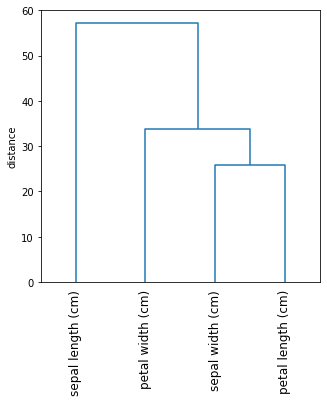

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(Z, labels=iris_df_t.index, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [5]:
from scipy.cluster.hierarchy import fcluster

memb = fcluster(Z, 4, criterion='maxclust')
memb = pd.Series(memb, index=iris_df_t.index)
for key, item in memb.groupby(memb):
    print(f'{key} : {", ".join(item.index)}')

1 : sepal width (cm), petal length (cm), petal width (cm)
2 : sepal length (cm)
